# Text Analysis of Succession - 4x07 "Tailgate Party" - Post Episode Discussion from Reddit

In [1]:
!pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 kB 4.4 MB/s eta 0:00:00


In [2]:
!pip install --upgrade praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import praw
from nltk.sentiment import SentimentIntensityAnalyzer

In [4]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

## Connection to Reddit

In [5]:
''' # create a Reddit instance
reddit = praw.Reddit(client_id='your_client_id',
                     client_secret='your_client_secret',
                     username='your_username',
                     password='your_password',
                     user_agent='your_user_agent')
'''

import pickle

# Open the reddit variable with app values as a pickle file
with open('reddit.pickle', 'rb') as f:
    reddit = pickle.load(f)

In [6]:
import re

# example Reddit post URL
url = 'https://www.reddit.com/r/SuccessionTV/comments/13baf32/succession_4x07_tailgate_party_post_episode/'

# extract the subreddit name and post ID from the URL
match = re.search(r'/r/(\w+)/comments/(\w+)/', url)
subreddit_name = match.group(1)
post_id = match.group(2)

print(subreddit_name, post_id)

SuccessionTV 13baf32


## Sentiment Analysis

We'll be doing an analysis of 499 posts.

In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [8]:
import warnings
warnings.filterwarnings("ignore", message=".*Using an asynchronous PRAW instance.*")


In [9]:
# get the subreddit and post using PRAW
subreddit = reddit.subreddit(subreddit_name)
post = reddit.submission(id=post_id)

# analyze the sentiment of each comment in the post
for comment in post.comments.list():
    if isinstance(comment, praw.models.MoreComments):
        continue
    sentiment = sia.polarity_scores(comment.body)
    print(f"Comment: {comment.body}")
    print(f"Sentiment: {sentiment}\n")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: LOL Tom doing the mocking cry hands when all those people getting fired, then hearing whispers about his own likely termination is hilarious. I love to hate these guys, they are all so well written
Sentiment: {'neg': 0.251, 'neu': 0.497, 'pos': 0.252, 'compound': 0.0192}

Comment: >Connor: “there’s one person here doesn’t think I’m a joke”

>Lukas: *blurred in the background points at himself*

I am dead
Sentiment: {'neg': 0.193, 'neu': 0.807, 'pos': 0.0, 'compound': -0.6486}

Comment: Roman’s freak out on Connor and then the groveling with Geri shows just how totally unraveled he is. He is going to lose it at the funeral I fear.
Sentiment: {'neg': 0.32, 'neu': 0.68, 'pos': 0.0, 'compound': -0.8834}

Comment: U.S. Ambassador to North Korea Connor Roy
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Comment: Well, the TomShiv crew will always have that precious minute or two at the beginning of the episode to cherish before it all went to shit.
Sentiment: {'neg

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer

# initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# analyze the sentiment of each comment in the post
compound_scores = []
for comment in post.comments.list():
    if isinstance(comment, praw.models.MoreComments):
        continue
    sentiment = sia.polarity_scores(comment.body)
    compound_scores.append(sentiment['compound'])

# calculate the average compound score and print the results
average_score = sum(compound_scores) / len(compound_scores)
num_comments = len(compound_scores)
print(f"Analyzed {num_comments} comments with an average compound score of {average_score:.2f}")


Analyzed 499 comments with an average compound score of 0.01


A compound score of 0.01 is positive but very close to neutral, which means that the analyzed comments may contain a mix of positive and negative sentiment, but overall the sentiment leans slightly towards the positive side. 


## Wordcloud

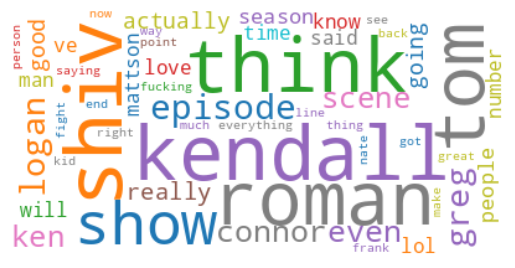

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# extract the comments from the post and remove any MoreComments objects
comments = [comment.body for comment in post.comments.list() if not isinstance(comment, praw.models.MoreComments)]

# add custom stopwords
stop_words = set(STOPWORDS)
stop_words.update(["s", "t", "one", "get", "would", "like", "re" "ve", "m"])

# remove stopwords and convert text to lowercase
clean_text = " ".join([word.lower() for word in " ".join(comments).split() if word.lower() not in stop_words])

# generate the wordcloud
color_map = plt.get_cmap('tab10') # create a custom color map
wordcloud = WordCloud(stopwords=stop_words, max_words=50, background_color="white", colormap=color_map).generate(clean_text)

# display the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## LSA

In [12]:
import numpy as np
import pandas as pd

# create a pandas DataFrame with a single column called "comments"
df = pd.DataFrame(comments, columns=["comments"])

In [13]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# stopwords in english
stop_words_en = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
def clean_text(headline):
  le = WordNetLemmatizer()
  word_tokens = word_tokenize(headline)
  tokens = [le.lemmatize(x) for x in word_tokens 
            if x not in stop_words_en and len(x) > 3]
  clean_text = " ".join(tokens)
  return clean_text

In [15]:
df['clean_comments'] = df['comments'].apply(clean_text)
df['clean_comments']

# aplicamos stemming
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')
df['stemmed_comments'] = [stemmer.stem(word) for word in df['clean_comments']]
df['stemmed_comments']

0      mocking hand people getting fired hearing whis...
1      connor person think joke lukas blurred backgro...
2      roman freak connor groveling geri show totally...
3                          ambassador north korea connor
4      well tomshiv crew always precious minute begin...
                             ...                        
494    favorite edie falco scene polish woman tony af...
495                where almost fucking died gave trauma
496             jared still precious loyalty richard pur
497                                    either last minut
498           talked mother alopecia sopranos still goat
Name: stemmed_comments, Length: 499, dtype: object

In [16]:
df.to_csv('file_name.csv', index=False)

In [17]:
df

,comments,clean_comments,stemmed_comments
0,LOL Tom doing the mocking cry hands when all t...,mocking hand people getting fired hearing whis...,mocking hand people getting fired hearing whis...
1,>Connor: “there’s one person here doesn’t thin...,Connor person think joke Lukas blurred backgro...,connor person think joke lukas blurred backgro...
2,Roman’s freak out on Connor and then the grove...,Roman freak Connor groveling Geri show totally...,roman freak connor groveling geri show totally...
3,U.S. Ambassador to North Korea Connor Roy,Ambassador North Korea Connor,ambassador north korea connor
4,"Well, the TomShiv crew will always have that p...",Well TomShiv crew always precious minute begin...,well tomshiv crew always precious minute begin...
...,...,...,...
494,My favorite Edie Falco scene was when the Poli...,favorite Edie Falco scene Polish woman Tony af...,favorite edie falco scene polish woman tony af...
495,Where he almost fucking died and just gave the...,Where almost fucking died gave trauma,where almost fucking died gave trauma
496,Jared is still precious & his loyalty to Richa...,Jared still precious loyalty Richard pure,jared still precious loyalty richard pur
497,Either that or very last minute,Either last minute,either last minut


In [18]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

svd_model = TruncatedSVD(n_components = 5, random_state = 42)
tfvec = TfidfVectorizer()
tf_p = tfvec.fit_transform(df.stemmed_comments)
svd_model.fit(tf_p)
terms = tfvec.get_feature_names_out()

for i, component in enumerate(svd_model.components_):
  terminos = zip(terms, component)
  top_terminos = sorted(terminos, key = lambda x: x[1], reverse = True)[:7]
  lista_temas = list(dict(top_terminos).keys())
  print("Topic "+str(i+1)+": ", lista_temas)

Topic 1:  ['think', 'shiv', 'kendall', 'roman', 'like', 'logan', 'connor']
Topic 2:  ['think', 'right', 'connor', 'shiv', 'want', 'willa', 'point']
Topic 3:  ['shiv', 'that', 'fight', 'gerri', 'scene', 'scorpion', 'balcony']
Topic 4:  ['greg', 'mattson', 'actually', 'oskar', 'ebba', 'people', 'would']
Topic 5:  ['number', 'that', 'really', 'kendall', 'homophob', 'frank', 'shiv']
